In [1]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler
from subprocess import check_output

Using TensorFlow backend.


In [2]:
data = pd.read_csv('Feature/advanced_feature.csv')

In [3]:
data.head()

,EnergyDCTDelta,EnergyIDCTDelta,EnergyFFTDelta,EnergyIFFTDelta,EnergyDWTcADelta,EnergyDWTcDDelta,EnergySTFTDelta,EnergyWVDDelta,EnergyDCTTheta,EnergyIDCTTheta,...,EnergyWVDGammaLow,EnergyDCTGammaMid,EnergyIDCTGammaMid,EnergyFFTGammaMid,EnergyIFFTGammaMid,EnergyDWTcAGammaMid,EnergyDWTcDGammaMid,EnergySTFTGammaMid,EnergyWVDGammaMid,Level
0,4.300000e+16,3.780000e+16,1.890000e+16,5.430000e+12,1.730000e+14,1.470000e+14,2.457627,7.020000e+31,3.500000e+17,2.990000e+17,...,7.200000e+31,3.370000e+16,3.310000e+16,1.650000e+16,4.750000e+12,1.400000e+14,1.400000e+14,2.457627,7.200000e+31,1
1,1.350000e+17,1.110000e+17,5.550000e+16,1.590000e+13,5.520000e+14,3.880000e+14,2.457627,2.200000e+32,3.950000e+17,3.150000e+17,...,2.240000e+32,6.880000e+16,6.640000e+16,3.320000e+16,9.540000e+12,2.820000e+14,2.810000e+14,2.457627,1.430000e+32,1
2,7.950000e+16,7.060000e+16,3.530000e+16,1.010000e+13,3.170000e+14,2.810000e+14,2.457627,1.420000e+32,3.940000e+17,3.320000e+17,...,6.250000e+32,3.370000e+16,3.310000e+16,1.660000e+16,4.760000e+12,1.410000e+14,1.400000e+14,2.457627,6.970000e+31,1
3,8.040000e+16,7.090000e+16,3.540000e+16,1.020000e+13,3.240000e+14,2.770000e+14,2.457627,1.430000e+32,2.630000e+17,2.320000e+17,...,8.020000e+32,3.370000e+16,3.310000e+16,1.660000e+16,4.760000e+12,1.410000e+14,1.400000e+14,2.457627,6.970000e+31,1
4,4.530000e+16,3.930000e+16,1.970000e+16,5.650000e+12,1.820000e+14,1.510000e+14,2.457627,7.300000e+31,5.340000e+17,4.150000e+17,...,2.230000e+32,3.380000e+16,3.320000e+16,1.660000e+16,4.760000e+12,1.410000e+14,1.400000e+14,2.457627,6.990000e+31,1


In [4]:
X = data.loc["EnergyDCTDelta":"EnergyWVDGammaMid",:]
y = data.Level

In [5]:
data.shape

(157, 65)

In [6]:
pca = PCA(0.95)
X_pca = pca.fit_transform(data)

In [7]:
pca.components_.shape

(6, 65)

In [8]:
pca.explained_variance_ratio_

array([0.43085732, 0.18662028, 0.14340911, 0.08151799, 0.07072373,
       0.04652403])

In [9]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca[:10000])

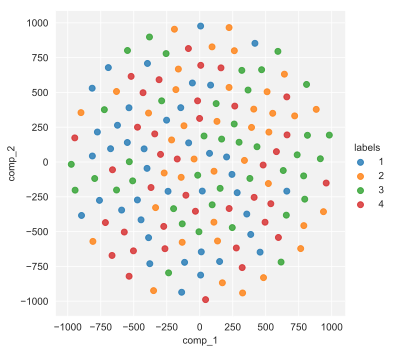

In [11]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(X_tsne)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(157) ,fit_reg=False)


In [12]:
#First going to process the data into image matricies
data = pd.read_csv('Feature/feature_tt1.csv')
X_train = data.loc["MeanDelta":"EnergygammaMid",:]
y_train = data.Level
Xp = tsne.fit_transform(X_pca[:10000])

[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 157 samples in 0.012s...
[t-SNE] Computed neighbors for 157 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 157 / 157
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.000000
[t-SNE] KL divergence after 650 iterations: 0.000000
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 157 samples in 0.000s...
[t-SNE] Computed neighbors for 157 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 157 / 157
[t-SNE] Mean sigma: 124.466498
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.333679
[t-SNE] KL divergence after 850 iterations: 1.215756
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 157 samples in 0.001s...
[t-SNE] Computed neighbors for 157 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 157 / 157
[t-SNE] Mean sigma: 235.547459
[t-SNE] KL divergence after 250 iteratio

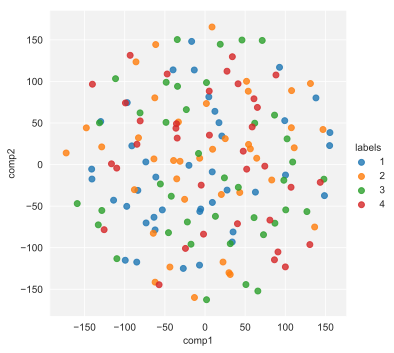

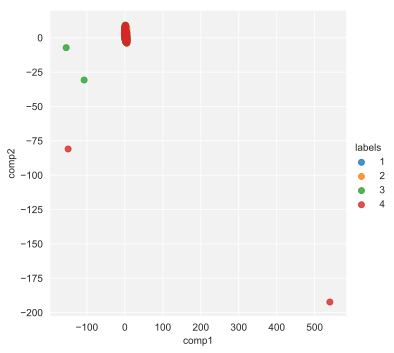

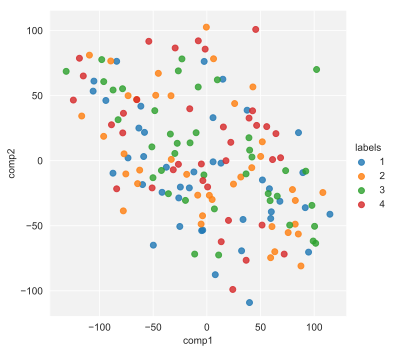

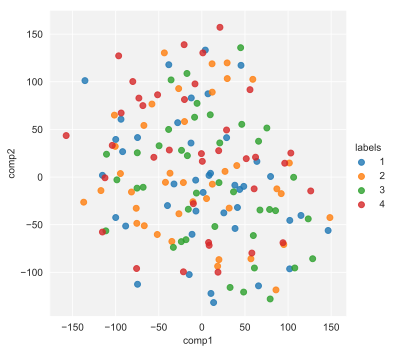

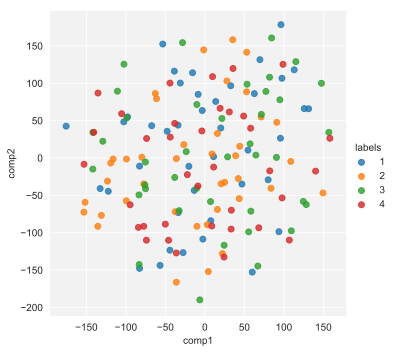

In [13]:
n_sne = 157
for i in range(5):
    tsne = TSNE(n_components=3,verbose=1,perplexity=10*i,n_iter=1000)
    X_tsne = tsne.fit_transform(Xp[:n_sne])
    Xf = pd.DataFrame(X_tsne)
    Xf.columns = ["comp1","comp2","comp3"]
    Xf['labels'] = y_train[:n_sne]
    sns.lmplot("comp1","comp2",hue="labels",data=Xf,fit_reg=False)

In [14]:
n_tsne=161
tsne = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=1000)
Xt = tsne.fit_transform(Xp[:n_tsne])
print(Xt.shape)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 157 samples in 0.001s...
[t-SNE] Computed neighbors for 157 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 157 / 157
[t-SNE] Mean sigma: 350.783409
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.223427
[t-SNE] KL divergence after 1000 iterations: 0.172327
(157, 2)


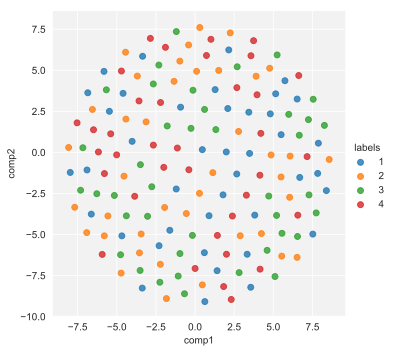

In [15]:
Xdf = pd.DataFrame(Xt)
Xdf.columns = ['comp1','comp2']
Xdf['labels'] = y_train[:n_tsne]
sns.lmplot('comp1','comp2',hue='labels',data=Xdf,fit_reg=False)